In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
from my_utils import plot_2d_mesh



In [6]:
basis_num = 10000
d = 2


W = np.random.randn(basis_num, d)
W = W/np.sqrt(np.sum(W**2, axis=1, keepdims=True))


# bias
b = np.random.rand(basis_num,1)*1



In [7]:
# # show cut lines
# eval_range = 2
# eval_mesh = 3
# x1 = np.linspace(-2,2,eval_mesh)[None,:] * np.ones((basis_num,1))
# x2 = (b - W[:,[0]]*x1)/W[:,[1]]
# plt.figure(figsize=(8,6))
# plt.plot(x1[0], x2.T)
# plt.plot(0,0,'*')
# plt.xlim(-eval_range, eval_range)
# plt.ylim(-eval_range, eval_range)
# plt.grid(which="both")
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.title('cut lines')
# plt.show()


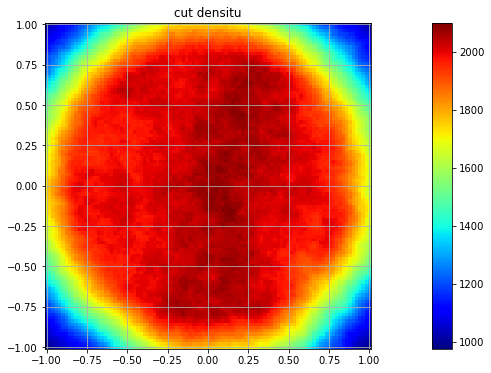

In [10]:
# line density
test_range = 1
test_mesh = 100
test_x_1d = np.linspace(-test_range,test_range, test_mesh)
test_x1_2d, test_x2_2d = np.meshgrid(test_x_1d, test_x_1d)
test_x = np.stack([test_x1_2d.flatten(), test_x2_2d.flatten()], axis=1)

# get distance
# d2test: (test_num, basis_num)
d2test = np.abs(np.matmul(test_x, W.T) + b.T)

band_width = 0.2
density = np.sum(d2test<band_width, axis=1)
density = density.reshape(test_mesh, test_mesh)

plot_2d_mesh(x1=test_x1_2d, x2=test_x2_2d, value=density.reshape(test_mesh, test_mesh),title='cut density')

